##Begin

### This file contains detail approach to analyse  loan data to understand the data its underlying structure, patterns, relationships between variables and identify risky loan applicants, Identification of such applicants using EDA using the given dataset is the aim of this case study.

#### The company wants to understand the driving factors (or driver variables) behind loan default, 
#### i.e. the variables which are strong indicators of default.  
#### The company can utilise this knowledge for its portfolio and risk assessment.

## Data Understanding

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Loading raw historical loan data
loan_raw_df = pd.read_csv("loan.csv")

C:\Users\pkhli\AppData\Local\Temp\ipykernel_8264\3700479021.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_raw_df = pd.read_csv("loan.csv")


In [5]:
#Analysis of few rows of data 
loan_raw_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#Understanding dimension of Dataframe
loan_raw_df.shape

(39717, 111)

In [7]:
#To identify information about the DataFrame including the number of entries (rows), the number of columns, the data types of each column
loan_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
#Getting information of null values in loan data
loan_raw_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Data Understanding summary: Loan data has 39717 rows , 111 columns. No summary ,header or footer rows identified

The data provide information of 

Customer Demographics: such as Annual Income (annual_inc) ,Home Ownership (home_ownership) ,Employment Length (emp_length),Employment Title(Emp_title) Debt to Income (dti),Open Account (open_acc),zip_code and few other columns as well.

Loan Attributes :Loan Ammount (loan_amt) ,Grade (grade),Term (term),Loan Date (issue_date),Purpose of Loan (purpose),Verification Status (verification_status),Interest Rate (int_rate),Installment (installment)

Major Data issue: There are lot of columns which has Null values .

# Data Cleaning and Manipulation

In [9]:
#Dropping all the columns which has all null values ,since this can not be used for analysis purpose in EDA
loan_raw_df = loan_raw_df.dropna(axis=1,how = 'all')

In [10]:
#Post dropping all null value columns,now there are 57 columns in data frame
loan_raw_df.shape

(39717, 57)

In [11]:
#We need to further identify null values in remaining columns for Data cleaning purpose
loan_raw_df.isnull().sum() 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
#Calculating % of null rows compared to tatal values
df_null_perc = (loan_raw_df.isnull().sum()/len(loan_raw_df.index))*100

In [13]:
#Identifying columns where more than 60% values are Null
col_tobe_dropped = df_null_perc[df_null_perc>60].keys()

In [14]:
col_tobe_dropped

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [15]:
#Drooped columns whice has more than 60% null values since those will not add insight for the analysis and imputing data in those columns will bias the Analysis
loan_df = loan_raw_df.drop(col_tobe_dropped,axis=1)

In [16]:
#Identifying columns with unique value couunt
df2 = loan_df.nunique()
print(df2)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [17]:
#Following columns have only 1 unique value
col = df2[df2.values == 1]
col

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [18]:
#Dropping Columns identified with above ,which has only one unique value and columns which will not add value to analysis since those will not be considered while accepting or rejecting loan application. for ex: out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_in','policy_code','application_type','url'etc.
loan_df = loan_df.drop(['out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee',
         'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','emp_title','url','title','sub_grade','earliest_cr_line','pymnt_plan','initial_list_status',
                         'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt',
                          'tax_liens','out_prncp','member_id','id','funded_amnt_inv','inq_last_6mths','desc'],axis=1)

In [19]:
#loan_df = loan_df.drop(['out_prncp'],axis =1)

#### Column Drop Summary
Dropped Columns will all null values. Dropped columns which are more than 60 % empty .
Dropped columns with 1 unique values since will not value in Analysis.
Dropped additional detail and desc columns which will not be considered while reviewing loan application approval process.

In [20]:
#Updated dimension of dataset post identified column deletion
loan_df.shape
    

(39717, 24)

In [21]:
loan_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,...,AZ,27.65,0,3,0,13648,83.70%,9,0.00,0.0
1,2500,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,...,GA,1.00,0,3,0,1687,9.40%,4,117.08,0.0
2,2400,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,...,IL,8.72,0,2,0,2956,98.50%,10,0.00,0.0
3,10000,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,...,CA,20.00,0,10,0,5598,21%,37,0.00,0.0
4,3000,3000,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,...,OR,17.94,0,15,0,27783,53.90%,38,0.00,0.0


In [22]:
#Dropping rows : Since Analysis is required on past loans so dropping the rows with loan Status=Current
loan_df = loan_df[~(loan_df['loan_status']=='Current')]

#### Missing value analysis and impute

In [23]:
#Identify missing rows % for each column
(loan_df.isnull().sum()/len(loan_df.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
recoveries              0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

In [24]:
loan_df.shape

(38577, 24)

In [25]:
loan_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,pub_rec_bankruptcies
0,5000,5000,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,...,AZ,27.65,0,3,0,13648,83.70%,9,0.00,0.0
1,2500,2500,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,...,GA,1.00,0,3,0,1687,9.40%,4,117.08,0.0
2,2400,2400,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,...,IL,8.72,0,2,0,2956,98.50%,10,0.00,0.0
3,10000,10000,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,...,CA,20.00,0,10,0,5598,21%,37,0.00,0.0
5,5000,5000,36 months,7.90%,156.46,A,3 years,RENT,36000.0,Source Verified,...,AZ,11.20,0,9,0,7963,28.30%,12,0.00,0.0


In [26]:
#Dataset where emp_length is null
loan_df[loan_df['emp_length'].isnull()]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,pub_rec_bankruptcies
168,2500,2500,36 months,7.51%,77.78,A,NaN,OWN,12000.0,Source Verified,...,CA,16.30,0,13,0,4853,42.20%,20,10.08,0.0
323,18000,18000,60 months,17.58%,452.98,D,NaN,MORTGAGE,60000.0,Verified,...,AL,21.96,0,11,0,5945,83.70%,28,0.00,0.0
394,4000,4000,36 months,11.71%,132.31,B,NaN,RENT,24000.0,Source Verified,...,FL,7.50,1,4,0,1593,54.90%,6,0.00,0.0
422,1000,1000,36 months,14.65%,34.50,C,NaN,RENT,18408.0,Not Verified,...,NJ,6.00,0,3,1,2510,83.70%,8,56.89,1.0
439,8250,8250,36 months,7.51%,256.67,A,NaN,MORTGAGE,31500.0,Verified,...,MD,17.87,0,17,0,7521,10.40%,37,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,10000,10000,36 months,14.22%,342.85,C,NaN,RENT,45000.0,Not Verified,...,PA,4.51,0,9,0,9696,66.40%,17,0.00,0.0
32608,3700,3700,36 months,14.22%,126.86,C,NaN,RENT,17496.8,Not Verified,...,TX,3.36,0,2,0,1605,45.90%,5,0.00,0.0
32621,10000,10000,36 months,14.22%,342.85,C,NaN,MORTGAGE,36000.0,Not Verified,...,MA,3.83,2,3,0,344,34.40%,19,12.43,0.0
32631,6000,6000,36 months,12.73%,201.40,C,NaN,MORTGAGE,60000.0,Not Verified,...,MN,12.80,0,7,1,7088,63.30%,12,0.00,0.0


In [27]:
#identifying unique value 
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [28]:
#retrieval  of mode value since emp_length is categorial column for impute purpose
loan_df['emp_length'].mode()

0    10+ years
Name: emp_length, dtype: object

In [29]:
#Imputing missing emp_length with mode value 10 years
loan_df['emp_length'] = loan_df['emp_length'].fillna('10 years')

In [30]:
#Post impute column values
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       '10 years'], dtype=object)

#### In next step will mody Data type of columns required and replacing required character for further analysis


In [31]:
#Formatting data in format that can be used for further analysis and assumption considered <1 year as 0 and 10+  as 10
loan_df['emp_length'] = loan_df['emp_length'].replace({'< 1 year':0,'10 years':10, '10+ years':10, '3 years':3, '8 years':8, '9 years':9,
       '5 years':5, '4 years':4, '1 year':1, '6 years':6, '2 years':2, '7 years':7,})

In [32]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   emp_length            38577 non-null  int64  
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  zip_code              38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

In [33]:
loan_df['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [34]:
#replaced % for data standardization purpose 
loan_df['revol_util'] = loan_df['revol_util'].str.replace("%","")

In [35]:
loan_df['revol_util'].unique()

array(['83.70', '9.40', '98.50', ..., '49.63', '0.04', '7.28'],
      dtype=object)

In [36]:
#Updated columns detail
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   emp_length            38577 non-null  int64  
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  zip_code              38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

In [37]:
#Changed Data type of term
loan_df['term'] = loan_df['term'].apply(lambda x: int(x[:-7]))

In [38]:
loan_df['term']

0        36
1        60
2        36
3        36
5        36
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38577, dtype: int64

In [39]:
#loan_df.head()

In [40]:
#For data standarization purpose removed trailing % 
loan_df['int_rate'] = loan_df['int_rate'].str.replace("%","")

In [41]:
#Changed Data type of int_rate as float since it was object
loan_df['int_rate'].astype(float)

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [42]:
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x : float(x))

In [43]:
loan_df['revol_util'].median()

49.1

In [44]:
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x : float(x))

In [45]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x))

In [46]:
#Updated column detail
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   term                  38577 non-null  int64  
 3   int_rate              38577 non-null  float64
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   emp_length            38577 non-null  int64  
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  zip_code              38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                   38

## Derived Columns

In [47]:
loan_df['issue_d']

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 38577, dtype: object

In [48]:
#Updated format of issue_d column
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

In [49]:
#Derived month column
loan_df['issue_d_Month'] = pd.DatetimeIndex(loan_df['issue_d']).month

In [50]:
#Derived year column
loan_df['issue_d_Year'] = pd.DatetimeIndex(loan_df['issue_d']).year

In [51]:
#Creating bins of Numerical columns for analysis further

loan_df['loan_amt_category'] = pd.cut(loan_df['loan_amnt'],[0,5000,10000,15000,20000,25000,30000],labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','30k+'])
loan_df['annual_inc_category'] = pd.cut(loan_df['annual_inc'],[0,20000,40000,60000,80000,100000,120000],labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k','120000+'])
loan_df['int_rate_category'] = pd.cut(loan_df['int_rate'],[0,5,10,12,15,18,20],labels=['0-5','5-10','10-15','15-20','20-25','25+'])
loan_df['open_acc_bin'] = pd.cut(loan_df['open_acc'],[0,10,20,30,40,45],labels=['2-10','10-20','20-30','30-40','40-45'])
loan_df['revol_util_bin'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_df['total_acc_bin'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_df['dti_bin'] = pd.cut(loan_df['dti'], bins=6,precision =0,labels=['0-5','5-10','10-15','15-20','20-25','25+'])


In [52]:
loan_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec_bankruptcies,issue_d_Month,issue_d_Year,loan_amt_category,annual_inc_category,int_rate_category,open_acc_bin,revol_util_bin,total_acc_bin,dti_bin
0,5000,5000,36,10.65,162.87,B,10,RENT,24000.0,Verified,...,0.0,12,2011,0-5k,20k-40k,10-15,2-10,80-100,2-20,25+
1,2500,2500,60,15.27,59.83,C,0,RENT,30000.0,Source Verified,...,0.0,12,2011,0-5k,20k-40k,20-25,2-10,0-20,2-20,0-5
2,2400,2400,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,...,0.0,12,2011,0-5k,0-20k,20-25,2-10,80-100,2-20,5-10
3,10000,10000,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,...,0.0,12,2011,5k-10k,40k-60k,15-20,2-10,20-40,20-37,20-25
5,5000,5000,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,...,0.0,12,2011,0-5k,20k-40k,5-10,2-10,20-40,2-20,10-15


### Outlier Analysis and Treatment and Distribution Analysis of Numerical Columns : loan_amnt, int_rate,annual_inc,dti,total_acct,installment

<Axes: xlabel='loan_amnt'>

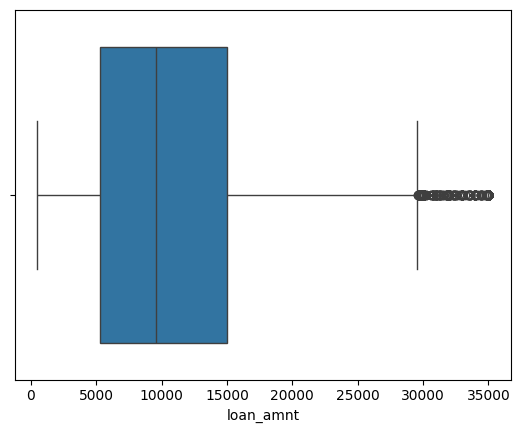

In [53]:
sns.boxplot(x= loan_df['loan_amnt'])

In [54]:
loan_df['loan_amnt'].quantile([0.25,0.75,0.85,0.90,0.95,1])

0.25     5300.0
0.75    15000.0
0.85    20000.0
0.90    21600.0
0.95    25000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

<Axes: xlabel='int_rate'>

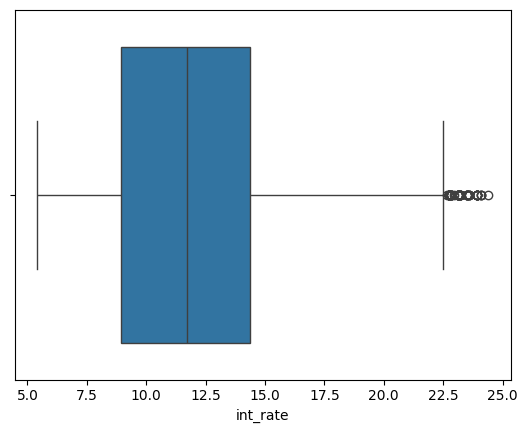

In [55]:
sns.boxplot(x= loan_df['int_rate'])

In [56]:
loan_df['int_rate'].quantile([0.25,0.75,0.85,0.90,0.95,.98,1])

0.25     8.940
0.75    14.380
0.85    15.960
0.90    16.820
0.95    18.312
0.98    19.910
1.00    24.400
Name: int_rate, dtype: float64

<Axes: xlabel='dti'>

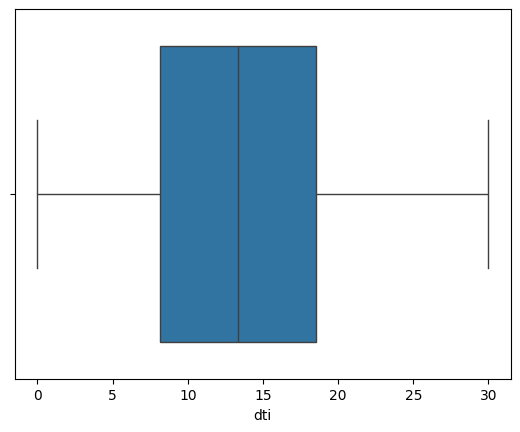

In [57]:
sns.boxplot(x= loan_df['dti'])

In [58]:
loan_df['dti'].quantile([0.25,0.75,0.85,0.90,0.95,.98,1])

0.25     8.13
0.75    18.56
0.85    20.92
0.90    22.29
0.95    23.80
0.98    24.85
1.00    29.99
Name: dti, dtype: float64

### Loan Amount(loan_amnt),intrest rate(int_rate) and dti column has outliers but those are continuous values so no need to remove outliers

<Axes: xlabel='annual_inc'>

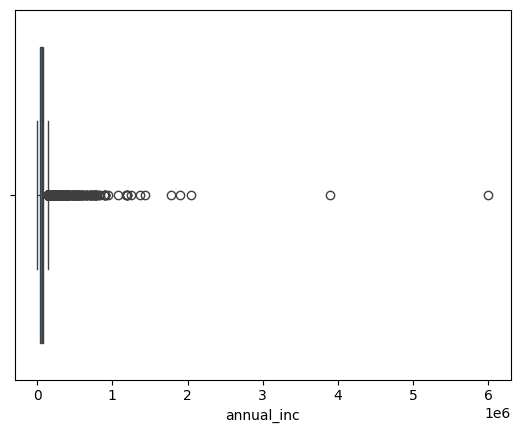

In [59]:
sns.boxplot(x= loan_df['annual_inc'])

In [60]:
loan_df['annual_inc'].quantile([0.25,0.75,0.85,0.90,0.95,.98,1])

0.25      40000.0
0.75      82000.0
0.85     100000.0
0.90     115000.0
0.95     140004.0
0.98     187000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [61]:
loan_df = loan_df[loan_df['annual_inc'] < (loan_df['annual_inc'].quantile(0.95))]

### Annual income has clear outlier values so taking data up to 0.95 quantile for Analysis since data is continuous till this point

<Axes: xlabel='annual_inc'>

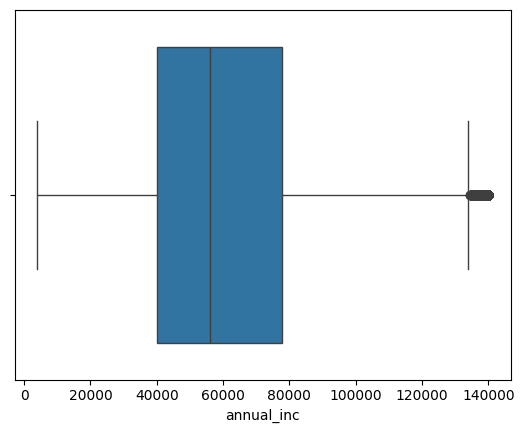

In [62]:
sns.boxplot(x= loan_df['annual_inc'])

<Axes: xlabel='installment'>

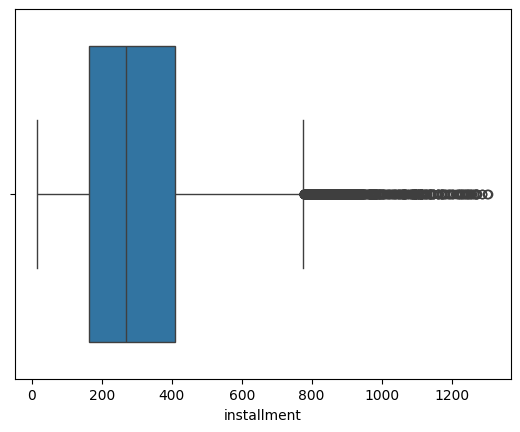

In [63]:
sns.boxplot(x=loan_df['installment'])

In [64]:
loan_df['installment'].quantile([0.25,0.75,0.85,0.90,0.95,.98,1])

0.25     163.0800
0.75     408.4800
0.85     509.8300
0.90     588.9850
0.95     706.4905
0.98     848.0158
1.00    1305.1900
Name: installment, dtype: float64

In [65]:
loan_df = loan_df[loan_df['installment']<=loan_df['installment'].quantile(0.98)]

<Axes: xlabel='installment'>

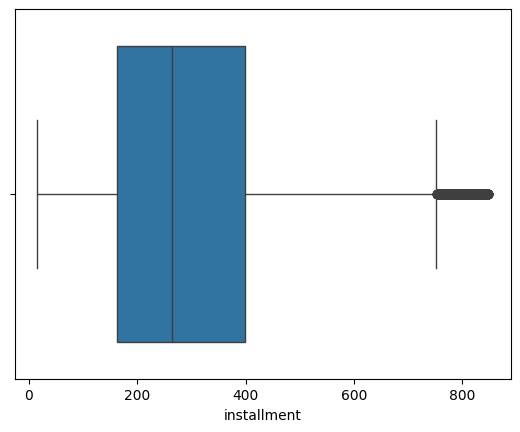

In [66]:
sns.boxplot(x = loan_df['installment'])

<Axes: xlabel='total_acc'>

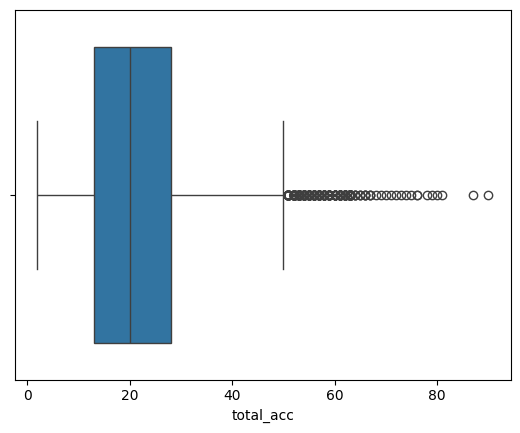

In [67]:
sns.boxplot(x=loan_df['total_acc'])

In [68]:
loan_df['total_acc'].quantile([0.25,0.75,0.85,0.90,0.95,.98,1])

0.25    13.00
0.75    28.00
0.85    33.00
0.90    37.00
0.95    43.00
0.98    49.84
1.00    90.00
Name: total_acc, dtype: float64

In [69]:
loan_df = loan_df[loan_df['total_acc']<=loan_df['total_acc'].quantile(0.98)]

<Axes: xlabel='total_acc'>

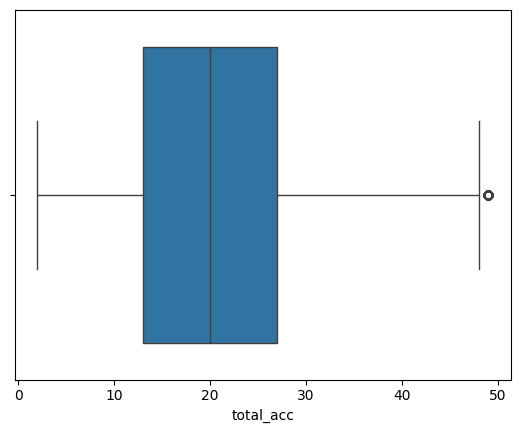

In [70]:
sns.boxplot(x=loan_df['total_acc'])

### Total Account and Instalments have outlier values so taking data up to 0.98 quantile for Analysis since data is continuous till this point

In [71]:
#Updated Data post Derived columns additions and outlier treatment
loan_df.shape

(35190, 33)

In [72]:
#Identification of description and satistics of numerical columns in dataset
loan_df.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,pub_rec_bankruptcies,issue_d_Month,issue_d_Year
count,35190.000000,35190.000000,35190.000000,35190.000000,35190.000000,35190.000000,35190.000000,35190,35190.000000,35190.000000,35190.000000,35190.000000,35190.000000,35142.000000,35190.000000,35190.000000,34549.000000,35190.000000,35190.000000
mean,10246.636118,9999.340011,41.803922,11.807176,297.815596,4.994487,59753.231661,2010-10-22 20:39:39.130434816,13.364002,0.143876,8.966439,0.057857,11896.351066,48.625696,20.818528,86.668400,0.045414,7.101989,2010.301563
min,500.000000,500.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,2007-06-01 00:00:00,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2007.000000
25%,5000.000000,5000.000000,36.000000,8.900000,161.320000,2.000000,39996.750000,2010-05-01 00:00:00,8.240000,0.000000,6.000000,0.000000,3430.000000,25.300000,13.000000,0.000000,0.000000,4.000000,2010.000000
50%,9000.000000,9000.000000,36.000000,11.710000,263.780000,4.000000,55000.000000,2011-01-01 00:00:00,13.470000,0.000000,8.000000,0.000000,8231.000000,49.000000,20.000000,0.000000,0.000000,7.000000,2011.000000
75%,14000.000000,14000.000000,36.000000,14.260000,396.920000,9.000000,75000.000000,2011-07-01 00:00:00,18.637500,0.000000,11.000000,0.000000,15603.750000,72.000000,27.000000,0.000000,0.000000,10.000000,2011.000000
max,35000.000000,35000.000000,60.000000,24.400000,847.960000,10.000000,140000.000000,2011-12-01 00:00:00,29.990000,11.000000,35.000000,4.000000,149000.000000,99.900000,49.000000,29623.350000,2.000000,12.000000,2011.000000
std,6512.602632,6228.937821,10.276751,3.611161,178.141508,3.586244,27258.383851,NaN,6.669843,0.488887,4.134629,0.242434,13368.451339,28.294594,10.127297,604.658217,0.208907,3.412573,0.884436


# Univariate Analysis
    

In [73]:
#Identifying total values count based on loan status
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     30016
Charged Off     5174
Name: count, dtype: int64

In [74]:
#Find Frequency of unique values
def find_freq(df, cols):
    return pd.DataFrame(data = {cols: df[cols].value_counts().index, 
                                'Freq': list(round(df[cols].value_counts())), 
                                "Freq_%": list(round(df[cols].value_counts(normalize=True)*100, 2))})

def biv_freq(df, rows, cols):
    res_df = pd.crosstab(index=df[rows], columns=df[cols]).reset_index()
    res_df['Def_%'] = res_df.apply(lambda x: round(100*x['Charged Off']/(x['Charged Off']+x['Fully Paid']), 2), axis=1)
    return res_df

### Quantitative columns analysis

In [75]:
loan_df.describe()

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,issue_d,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,recoveries,pub_rec_bankruptcies,issue_d_Month,issue_d_Year
count,35190.000000,35190.000000,35190.000000,35190.000000,35190.000000,35190.000000,35190.000000,35190,35190.000000,35190.000000,35190.000000,35190.000000,35190.000000,35142.000000,35190.000000,35190.000000,34549.000000,35190.000000,35190.000000
mean,10246.636118,9999.340011,41.803922,11.807176,297.815596,4.994487,59753.231661,2010-10-22 20:39:39.130434816,13.364002,0.143876,8.966439,0.057857,11896.351066,48.625696,20.818528,86.668400,0.045414,7.101989,2010.301563
min,500.000000,500.000000,36.000000,5.420000,15.690000,0.000000,4000.000000,2007-06-01 00:00:00,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2007.000000
25%,5000.000000,5000.000000,36.000000,8.900000,161.320000,2.000000,39996.750000,2010-05-01 00:00:00,8.240000,0.000000,6.000000,0.000000,3430.000000,25.300000,13.000000,0.000000,0.000000,4.000000,2010.000000
50%,9000.000000,9000.000000,36.000000,11.710000,263.780000,4.000000,55000.000000,2011-01-01 00:00:00,13.470000,0.000000,8.000000,0.000000,8231.000000,49.000000,20.000000,0.000000,0.000000,7.000000,2011.000000
75%,14000.000000,14000.000000,36.000000,14.260000,396.920000,9.000000,75000.000000,2011-07-01 00:00:00,18.637500,0.000000,11.000000,0.000000,15603.750000,72.000000,27.000000,0.000000,0.000000,10.000000,2011.000000
max,35000.000000,35000.000000,60.000000,24.400000,847.960000,10.000000,140000.000000,2011-12-01 00:00:00,29.990000,11.000000,35.000000,4.000000,149000.000000,99.900000,49.000000,29623.350000,2.000000,12.000000,2011.000000
std,6512.602632,6228.937821,10.276751,3.611161,178.141508,3.586244,27258.383851,NaN,6.669843,0.488887,4.134629,0.242434,13368.451339,28.294594,10.127297,604.658217,0.208907,3.412573,0.884436


### Above data provide statistical detail of all numerical columns, Will analyse few in detail to find trend visually.

In [76]:
def univar_Num_analysis(column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.histplot(column, kde=True, ax=p[0])
    sns.boxplot(x=column, data=loan_df, ax=p[1])
    plt.show()

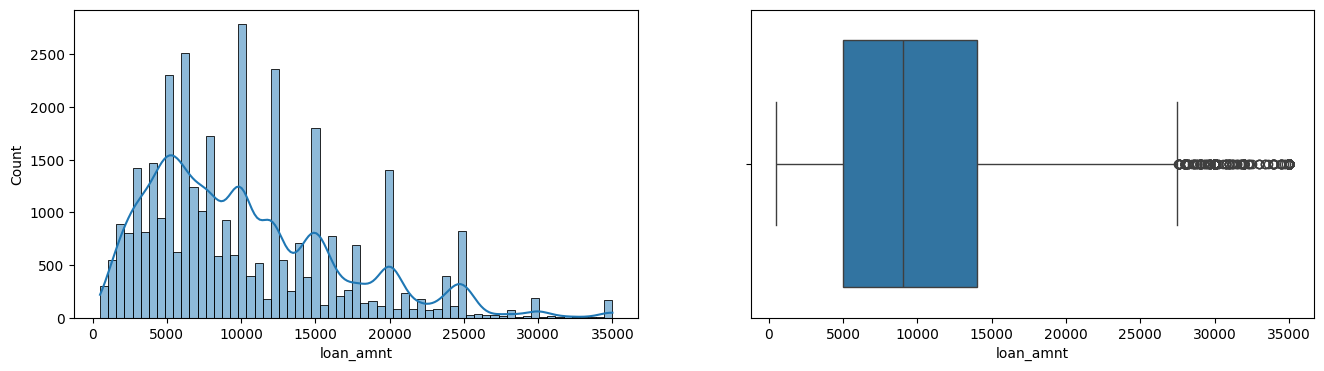

<Figure size 640x480 with 0 Axes>

In [77]:
univar_Num_analysis(loan_df['loan_amnt'])

#### Majority of loan Amount in range 4k - 12 k

In [78]:
loan_df['installment'].describe()

count    35190.000000
mean       297.815596
std        178.141508
min         15.690000
25%        161.320000
50%        263.780000
75%        396.920000
max        847.960000
Name: installment, dtype: float64

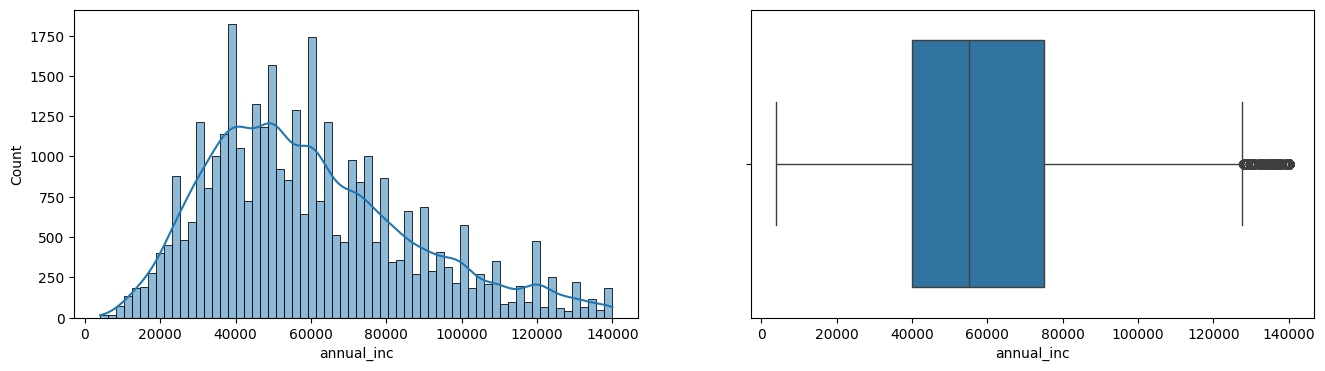

<Figure size 640x480 with 0 Axes>

In [79]:
univar_Num_analysis(loan_df['annual_inc'])

#### Majority of Income Amount in range 40k - 75k

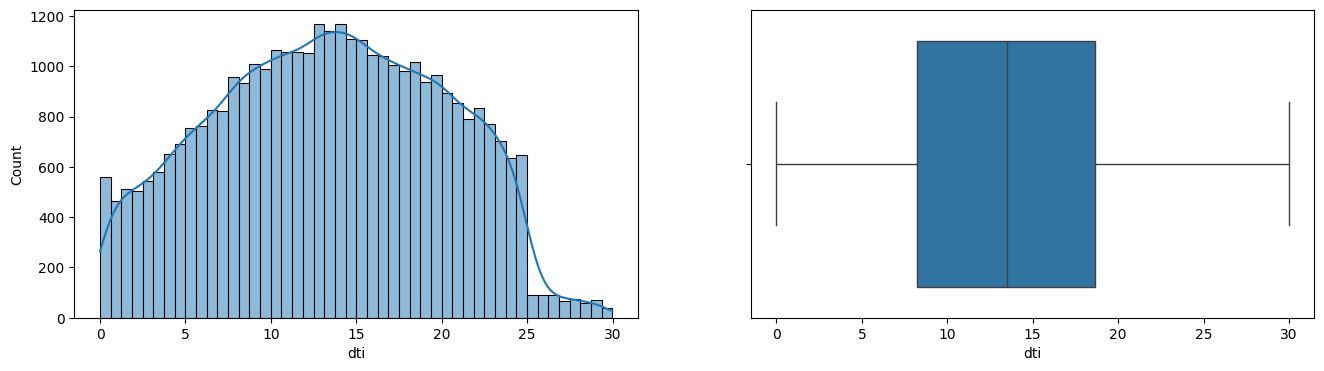

<Figure size 640x480 with 0 Axes>

In [80]:
univar_Num_analysis(loan_df['dti'])

#### DTI range is from 0 to 30 and majority in 7-18 range

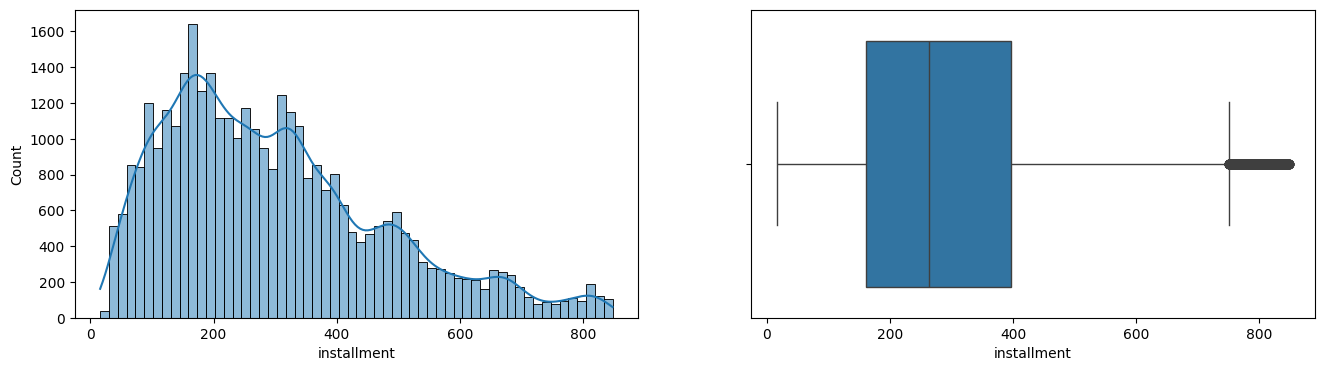

<Figure size 640x480 with 0 Axes>

In [81]:
univar_Num_analysis(loan_df['installment'])

#### DTI range is from 16 to 847 

### Categorial Columns Analysis

In [82]:
#### Analyzing columns with the objects dtypes attributes and shows their count/frequency/max/quartiles,to derive overall insight

In [83]:

loan_df.describe(include='O')

,grade,home_ownership,verification_status,loan_status,purpose,zip_code,addr_state
count,35190,35190,35190,35190,35190,35190,35190
unique,7,5,3,2,14,816,50
top,B,RENT,Not Verified,Fully Paid,debt_consolidation,945xx,CA
freq,10828,17603,15909,30016,16465,483,6339


#### Observations of Categorial columns description:
* Most loan applicant in Grade B
* Max Employment length is 10 years
* Maximum home ownership in Rent Category
* Not varified has maximum count for verification status 
* Majority of loan taken Debt_consolidation purpose
* zip_code and address for majority of customers are 945xx and CA respectively


In [84]:
def UniVar_Analysis(Column,xlbl,ylbl,title):
    ax = sns.countplot(y=Column, data= loan_df)
    # Set label for x-axis 
    ax.set_xlabel( xlbl , size = 8 )
    # Set label for y-axis 
    ax.set_ylabel( ylbl , size = 8 ) 
    # Set title for plot a
    ax.set_title( title , size = 12 ) 
  
# Display figure 
plt.show() 

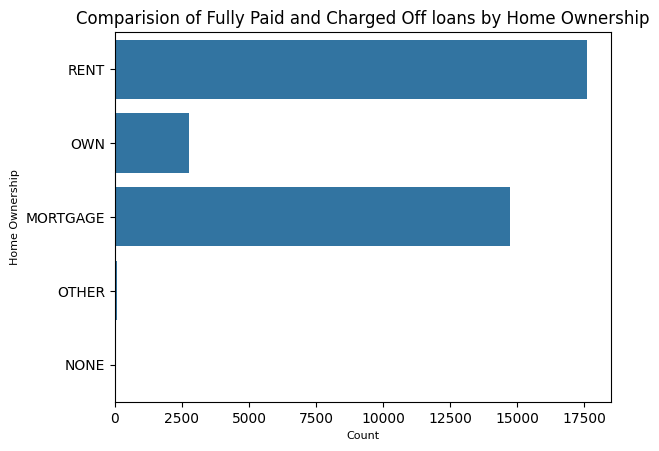

In [85]:
UniVar_Analysis('home_ownership','Count','Home Ownership','Comparision of Fully Paid and Charged Off loans by Home Ownership')

In [86]:
loan_df['home_ownership'].mode()

0    RENT
Name: home_ownership, dtype: object

In [87]:
#Replacing None value in home_ownership with mode value since it ia a categorial column
loan_df.loc[loan_df['home_ownership'] == 'NONE', 'home_ownership'] = 'RENT'

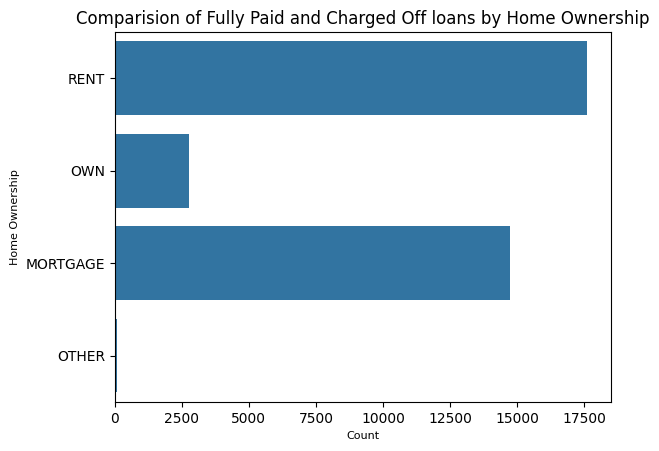

In [88]:
UniVar_Analysis('home_ownership','Count','Home Ownership','Comparision of Fully Paid and Charged Off loans by Home Ownership')

#### Most of the customers's either stay on rented or mortgage homes

### Visual analysis of few  important columns, Analysing in pair plot view for more concise look.

In [89]:
def univar_Col_analysis():
    fig, p = plt.subplots(4,2, figsize=(18, 18))
    ax1=sns.countplot(y='purpose', data= loan_df,ax=p[0][0])
    ax1.set_ylabel( 'purpose' , size = 8 )
    ax1.set_title( 'Comparision of Fully Paid and Charged Off loans by purpose' , size = 11 )
    ax2=sns.countplot(y='issue_d_Month', data= loan_df, ax=p[1][0])
    ax2.set_ylabel( 'issue_d_Month' , size = 8 )
    ax2.set_title( 'Comparision of Fully Paid and Charged Off loans by issue_d_Month' , size = 11 )
    ax3=sns.countplot(y='issue_d_Year', data= loan_df, ax=p[0][1])
    ax3.set_ylabel( 'issue_d_Year' , size = 8 )
    ax3.set_title( 'Comparision of Fully Paid and Charged Off loans by issue_d_Year' , size = 11 )
    ax4=sns.countplot(y='emp_length', data= loan_df, ax=p[1][1])
    ax4.set_ylabel( 'emp_length' , size = 8 )
    ax4.set_title( 'Comparision of Fully Paid and Charged Off loans by emp_length' , size = 11 )
    ax5=sns.countplot(y='loan_amt_category', data= loan_df, ax=p[2][0])
    ax5.set_ylabel( 'loan_amt_category' , size = 8 )
    ax5.set_title( 'Comparision of Fully Paid and Charged Off loans by loan_amt_category' , size = 11 )
    ax6=sns.countplot(y='annual_inc_category', data= loan_df, ax=p[2][1])
    ax6.set_ylabel( 'annual_inc_category', size = 8 )
    ax6.set_title( 'Comparision of Fully Paid and Charged Off loans by annual_inc_category' , size = 11 )
    ax6=sns.countplot(y='grade', data= loan_df, ax=p[3][0])
    ax6.set_ylabel( 'grade', size = 8 )
    ax6.set_title( 'Comparision of Fully Paid and Charged Off loans by grade' , size = 11 )
    ax6=sns.countplot(y='grade', data= loan_df, ax=p[3][0])
    ax6.set_ylabel( 'grade', size = 8 )
    ax6.set_title( 'Comparision of Fully Paid and Charged Off loans by grade' , size = 11 )
    ax6=sns.countplot(y='term', data= loan_df, ax=p[3][1])
    ax6.set_ylabel( 'term', size = 8 )
    ax6.set_title( 'Comparision of Fully Paid and Charged Off loans by term' , size = 11 )
    plt.show()

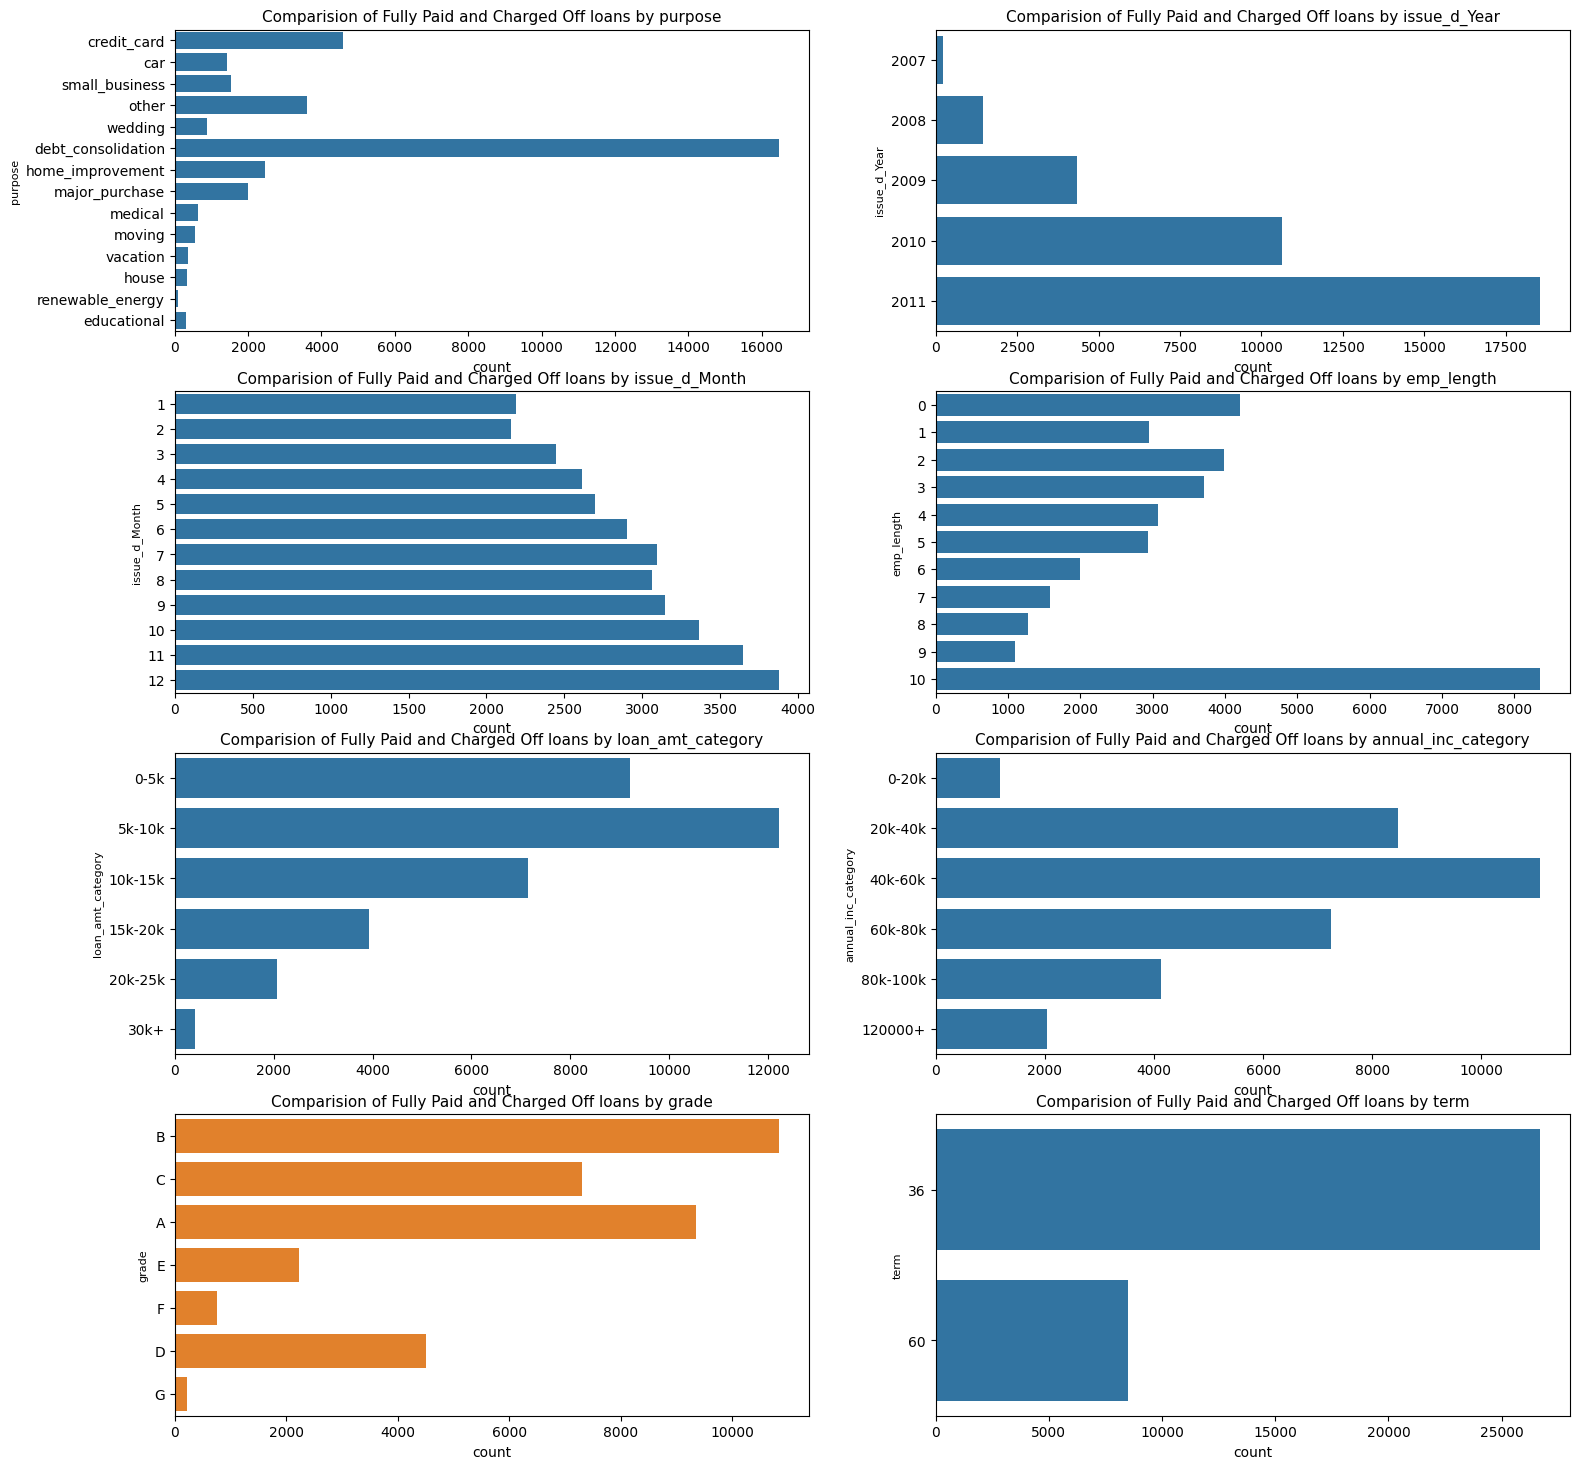

In [90]:
univar_Col_analysis()

### Univariate Analysis Observations Summary :
* Purpose : Most loan purpose are debt consolidation followed by Credit card
* Loan Issue Month : Loan Application count increases in month of dec.
* Loan_status: Approximately every 5 th loan is default loan.
* Loan Issue Year: from 2007 to 2011 ,most of the loan funded in Year 2011
* Loan Amount Category : Maximum loan amount are in 5k-10k range and very less are taking higher than 30K loan.
* Annual Income Category : Maximum Customers 40k - 60k Annual income range followed by 20 k - 40 k income range
* term : Most of Customer have opted for 36 month term for loan.
* Maximum Customers either have rented house or Mortgage
* Max Employment length is 10 years
* zip_code and address for majority of customers are 945xx and CA respectively.


### Bivariate Analysis
#### Analysis will be done to find key drivers for default(Charged off) loans,to understand precautions needed while reviewing the  loan Application

In [91]:
def loan_status_plot(df, column, hue=None, annot=1):
        ax = sns.countplot(data = df, y=column, order=df[column].value_counts().index, hue=hue).set_title( 'Charged Off loans Analysis by ' +column + ' category' , size = 10 )
        plt.show()


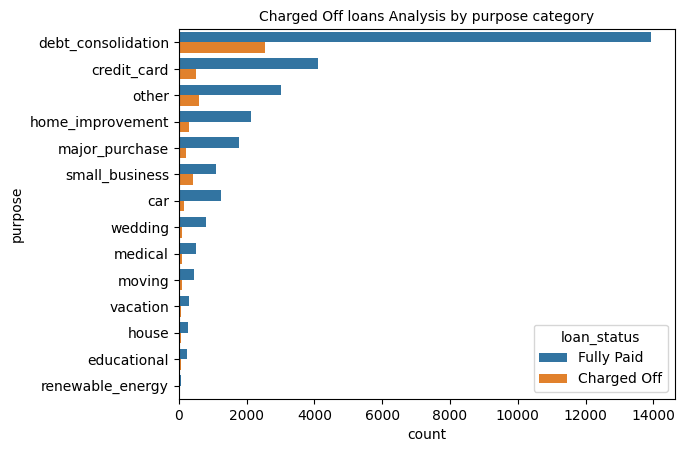

In [92]:
#Analysis of purpose of loan for default loan category
loan_status_plot(loan_df, 'purpose','loan_status')

In [93]:
#Analysis of % of default loan for difference purpose loan category
prupose_status = biv_freq(loan_df, 'purpose', 'loan_status').sort_values('Def_%', ascending=False)
prupose_status

loan_status,purpose,Charged Off,Fully Paid,Def_%
11,small_business,421,1106,27.57
10,renewable_energy,18,72,20.00
3,educational,52,255,16.94
8,moving,89,453,16.42
9,other,590,3017,16.36
7,medical,102,522,16.35
5,house,51,272,15.79
2,debt_consolidation,2530,13935,15.37
12,vacation,51,308,14.21
4,home_improvement,310,2140,12.65


#### Observation from loan purpose anaysis : 
* % wise most default in Small_business purpose loan however the count of loan is less in this category.
* Count of loan in debt_consolidation purpose is maximum .

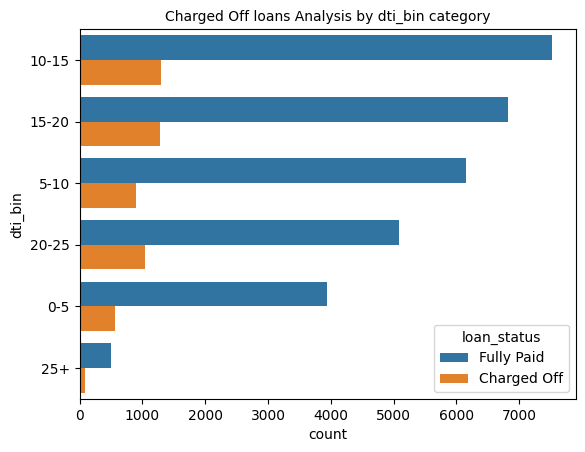

In [94]:
#Analysis of purpose of default loan by dti category
loan_status_plot(loan_df, 'dti_bin','loan_status')

In [95]:
#Analysis of purpose of default loan by dti category
dti_status = biv_freq(loan_df, 'dti_bin', 'loan_status').sort_values('Def_%', ascending=False)
dti_status

loan_status,dti_bin,Charged Off,Fully Paid,Def_%
4,20-25,1046,5081,17.07
3,15-20,1275,6824,15.74
2,10-15,1299,7521,14.73
5,25+,83,502,14.19
1,5-10,903,6153,12.80
0,0-5,568,3935,12.61


<Axes: xlabel='open_acc', ylabel='dti'>

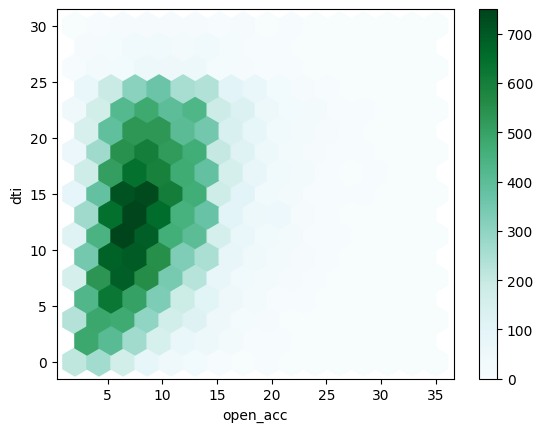

In [96]:
#Open Acc and dti remationship analysis
loan_df.plot.hexbin(x='open_acc', y='dti', gridsize=15)

#### Majority of loan default happened for Debt to Income ratio is  more than 10 and those customer has more open account in range 5 -10

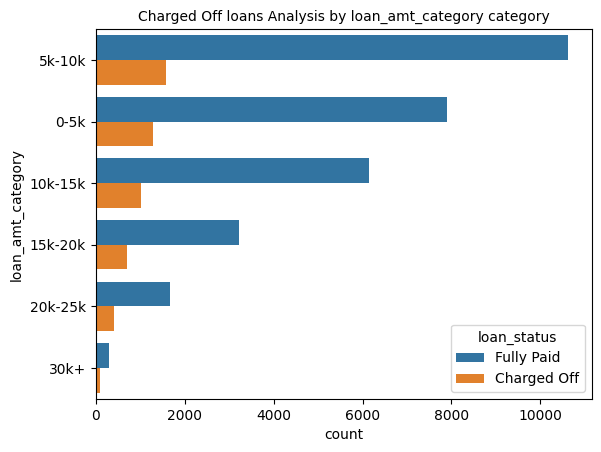

In [97]:
#Analysis Default loan for difference loan amount category
loan_status_plot(loan_df, 'loan_amt_category','loan_status')


In [98]:
loan_amt_status = biv_freq(loan_df, 'loan_amt_category', 'loan_status').sort_values('Def_%', ascending=False)
loan_amt_status

loan_status,loan_amt_category,Charged Off,Fully Paid,Def_%
5,30k+,103,297,25.75
4,20k-25k,413,1663,19.89
3,15k-20k,705,3232,17.91
2,10k-15k,1010,6135,14.14
0,0-5k,1288,7908,14.01
1,5k-10k,1587,10625,13.00


* % wise most default in 30k+ loan_amt_category however the count of loan is less in this category.
* Count of  Default loan in 5k - 10k loan Amount  category is maximum .
* Higher the loan Amount more probability of default

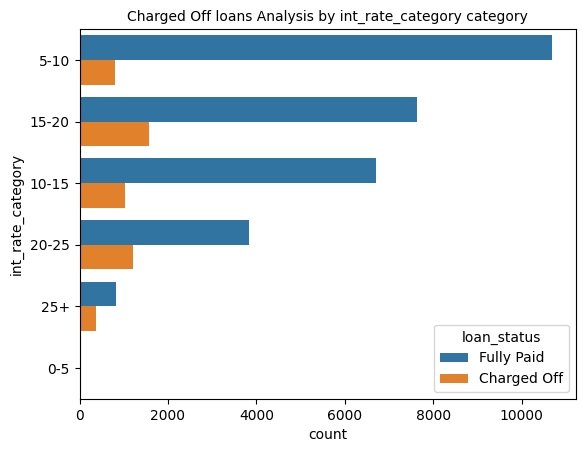

In [99]:
#Analysis of Intrest rate Amount Category effect on default loan probability 
loan_status_plot(loan_df, 'int_rate_category','loan_status')

In [100]:
#Analysis of Intrest rate Amount Category effect on default loan probability
int_rate_status = biv_freq(loan_df, 'int_rate_category', 'loan_status').sort_values('Def_%', ascending=False)
int_rate_status

loan_status,int_rate_category,Charged Off,Fully Paid,Def_%
4,25+,374,824,31.22
3,20-25,1205,3829,23.94
2,15-20,1561,7638,16.97
1,10-15,1019,6708,13.19
0,5-10,793,10682,6.91


#### Majority of loan default happened for Interest Rate is  between 15 to 20 % considering volume of loan is maximum for this category.

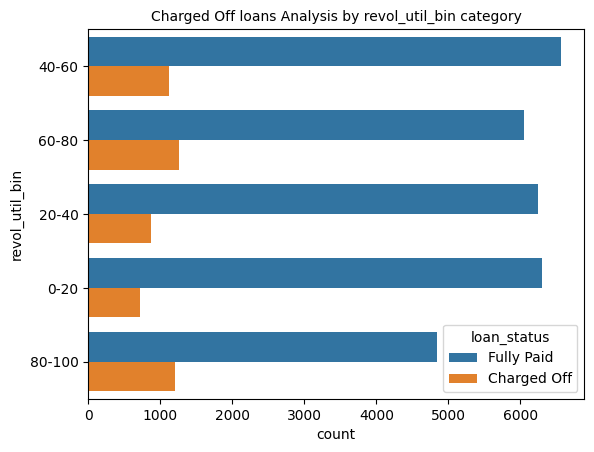

In [101]:
#Analysis of Revolving utilization rate Category effect on default loan probability
loan_status_plot(loan_df, 'revol_util_bin','loan_status')

In [102]:
#Analysis of & Revolving utilization rate Category of and Def_% in those
revol_util_status = biv_freq(loan_df, 'revol_util_bin', 'loan_status').sort_values('Def_%', ascending=False)
revol_util_status

loan_status,revol_util_bin,Charged Off,Fully Paid,Def_%
4,80-100,1199,4839,19.86
3,60-80,1254,6047,17.18
2,40-60,1124,6560,14.63
1,20-40,868,6243,12.21
0,0-20,713,6295,10.17


#### Maximum loan default happened in Revolving line utilization rate is more than 60.

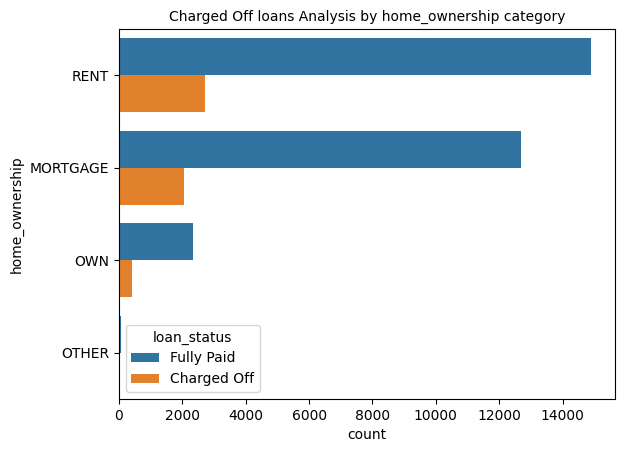

In [103]:
#Analysis of Home ownership type effect for default loan category
loan_status_plot(loan_df, 'home_ownership','loan_status')


#### Maximum loan default happend where home ownership is Rent

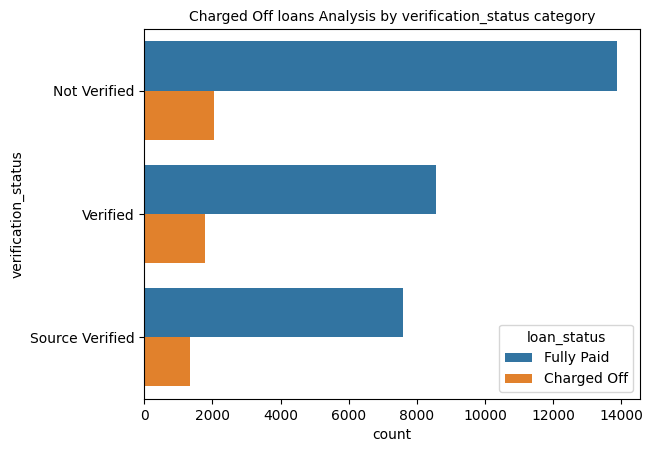

In [104]:
#Analysis of verification status effect for default loan category
loan_status_plot(loan_df, 'verification_status','loan_status')


In [105]:
ver_status = biv_freq(loan_df, 'verification_status', 'loan_status').sort_values('Def_%', ascending=False)
ver_status

loan_status,verification_status,Charged Off,Fully Paid,Def_%
2,Verified,1779,8569,17.19
1,Source Verified,1344,7589,15.05
0,Not Verified,2051,13858,12.89


#### Maximum loan default happened where verification status is not verified.

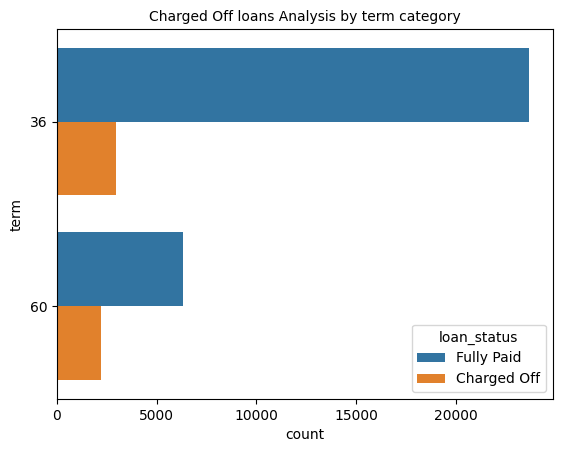

In [106]:
#Analysis of loan term effect for default loan category
loan_status_plot(loan_df, 'term','loan_status')

In [107]:
#Finding frequncy of loan term
find_freq(loan_df, 'term')

,term,Freq,Freq_%
0,36,26680,75.82
1,60,8510,24.18


In [108]:
biv_freq(loan_df, 'term', 'loan_status')

loan_status,term,Charged Off,Fully Paid,Def_%
0,36,2986,23694,11.19
1,60,2188,6322,25.71


#### Loan - Term
* Customers favour taking loans with lower payback period as 75% of customers prefer 36 month period
* There is a approx. 15% increase in Charge off customers with increase in payback term
*  While 10% defaulted in 36 month period, more than 25% defaulted in 60 month period
*  More precaution should be taken for granting loan for 60 month term


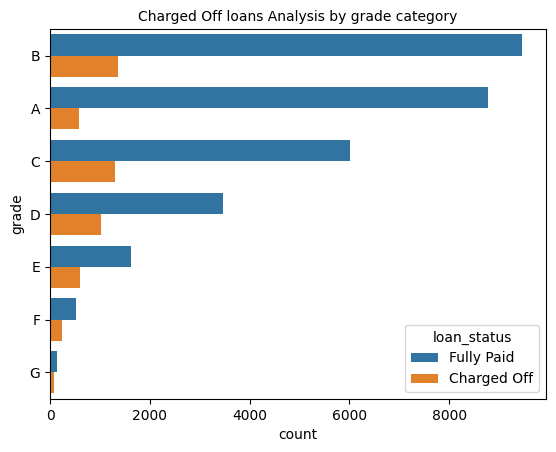

In [109]:
#Analysis of grade effect for default loan category
loan_status_plot(loan_df, 'grade','loan_status')

In [110]:
grade_status = biv_freq(loan_df, 'grade', 'loan_status').sort_values('Def_%', ascending=False)
grade_status

loan_status,grade,Charged Off,Fully Paid,Def_%
6,G,79,135,36.92
5,F,244,518,32.02
4,E,599,1633,26.84
3,D,1023,3477,22.73
2,C,1293,6009,17.71
1,B,1358,9470,12.54
0,A,578,8774,6.18


#### G and F has maximum Default % however if we compare volume of loan in each grade ,B and C grades are more likely to default. 

In [111]:
#Analysis of emloyment effect for default loan category
find_freq(loan_df, 'emp_length')

,emp_length,Freq,Freq_%
0,10,8351,23.73
1,0,4212,11.97
2,2,3986,11.33
3,3,3715,10.56
4,4,3079,8.75
5,1,2954,8.39
6,5,2935,8.34
7,6,1999,5.68
8,7,1582,4.50
9,8,1277,3.63


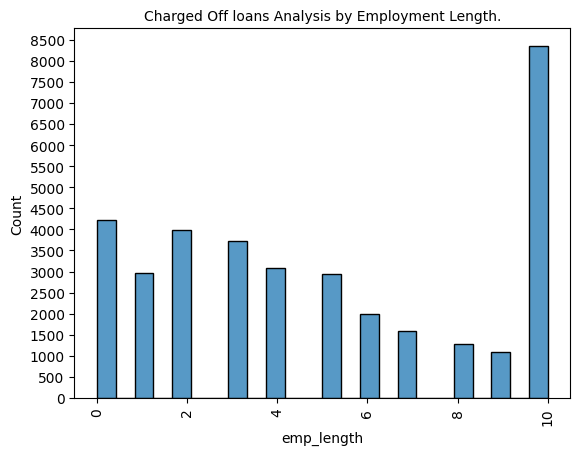

In [112]:
sns.histplot(loan_df['emp_length']).set_title( 'Charged Off loans Analysis by Employment Length.' , size = 10 )
plt.yticks(ticks=np.arange(0, 9000, 500), labels=np.arange(0, 9000, 500))
plt.xticks(rotation=90)
plt.show()

In [113]:
emp_status = biv_freq(loan_df, 'emp_length', 'loan_status').sort_values('Def_%', ascending=False)
emp_status

loan_status,emp_length,Charged Off,Fully Paid,Def_%
10,10,1405,6946,16.82
7,7,239,1343,15.11
1,1,433,2521,14.66
8,8,184,1093,14.41
5,5,422,2513,14.38
6,6,283,1716,14.16
0,0,594,3618,14.10
3,3,519,3196,13.97
4,4,422,2657,13.71
2,2,531,3455,13.32


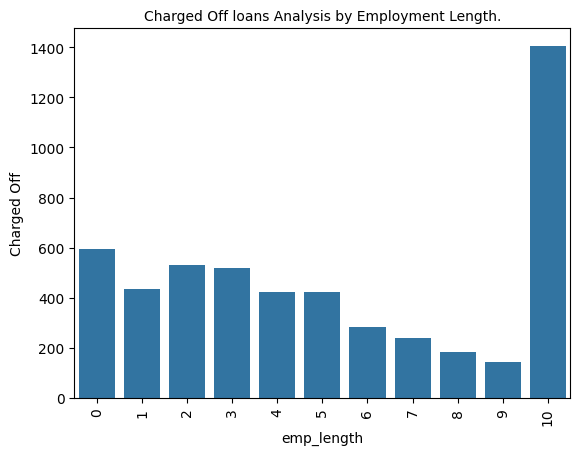

In [114]:
sns.barplot(emp_status, x='emp_length', y='Charged Off').set_title( 'Charged Off loans Analysis by Employment Length.' , size = 10 )
plt.xticks(rotation=90)
plt.show()

#### Employee Length vs Loan Status
* Percentage of defaulters decreases from 0 yrs till 8 yrs, then explodes to 16% with 10+ years
* Low defaulters rate at 9 yrs period may be due to considerable decrease in people seeking loans
* Number of customers taking loans at 10+ yrs has doubled that of the next highest
* more customers tend to take loans after 10 yrs in job which also has increased the number of defaulters

In [115]:
# Top 15 states with defaults
state_status = biv_freq(loan_df, 'addr_state', 'loan_status')
state_status.sort_values('Charged Off', ascending=False)[:15]

loan_status,addr_state,Charged Off,Fully Paid,Def_%
4,CA,1034,5305,16.31
9,FL,466,2100,18.16
33,NY,446,2895,13.35
42,TX,273,2083,11.59
30,NJ,258,1337,16.18
10,GA,201,1035,16.26
14,IL,185,1154,13.82
44,VA,169,1087,13.46
37,PA,166,1206,12.10
20,MD,147,774,15.96


#### States vs Loan Status
* Customers from CA default the most followed by NY and TX 
* Defaulters from CA are more than twice the number of NY
* Although the percentage is less, sheer volume can make an impact

## Bivariate Analysis Observations summary to identify probable loan defaulter indicator

## Observations

#### The following is suggested and Def% by the preceding study of the charged off loans for each variable.  Defaulting is more likely to occur when:
* Loan is taken for Debt clearance and small business purpose.
* When Debt to Income ratio is  more than 10.
* When Interest rate on loan is more than 15 %
* When Revolving line utilization rate is more than 60 .
* When loan grade is B or C
* When Customer’s home ownership is Rent ot mortgage
* Where Verification is not done
* When Loan term is 36 since most of customer are taking loan in this term category so default count is more but Default % is more in term range 60 so term 60 likely to default more .
* More customers tend to take loans after 10 yrs in job which also has increased the number of defaulters ,hence 10+ years employment length customers are likely to default more
* Customers is from CA also chances to default more followed by address from NY and TX





### More Analysis on variables co relation and impact on Default probability

In [116]:
# Analysis of loan status bu actual values of following numerical columns given in list to get more insight
List2=['dti','int_rate','annual_inc','loan_amnt','total_acc','revol_util']
def loanstatus_analysis(List2):
    fig, p = plt.subplots(3,2, figsize=(16, 16))
    sns.boxplot(data=loan_df, y=List2[0], x='loan_status',ax=p[0][0]).set_title( 'Loan Status Analysis by dti.' , size = 10 )
    sns.boxplot(data=loan_df, y=List2[1], x='loan_status',ax=p[1][0]).set_title( 'Loan Status Analysis by intrest rate.' , size = 10 )
    sns.boxplot(data=loan_df, y=List2[2], x='loan_status',ax=p[0][1]).set_title( 'Loan Status Analysis by annual income.' , size = 10 )
    sns.boxplot(data=loan_df, y=List2[3], x='loan_status',ax=p[1][1]).set_title( 'Loan Status Analysis by loan Amount.' , size = 10 )
    sns.boxplot(data=loan_df, y=List2[4], x='loan_status',ax=p[2][0]).set_title( 'Loan Status Analysis by total account#.' , size = 10 )
    sns.boxplot(data=loan_df, y=List2[5], x='loan_status',ax=p[2][1]).set_title( 'Loan Status Analysis by Revol. utilization rate.' , size = 10 )
    plt.show()

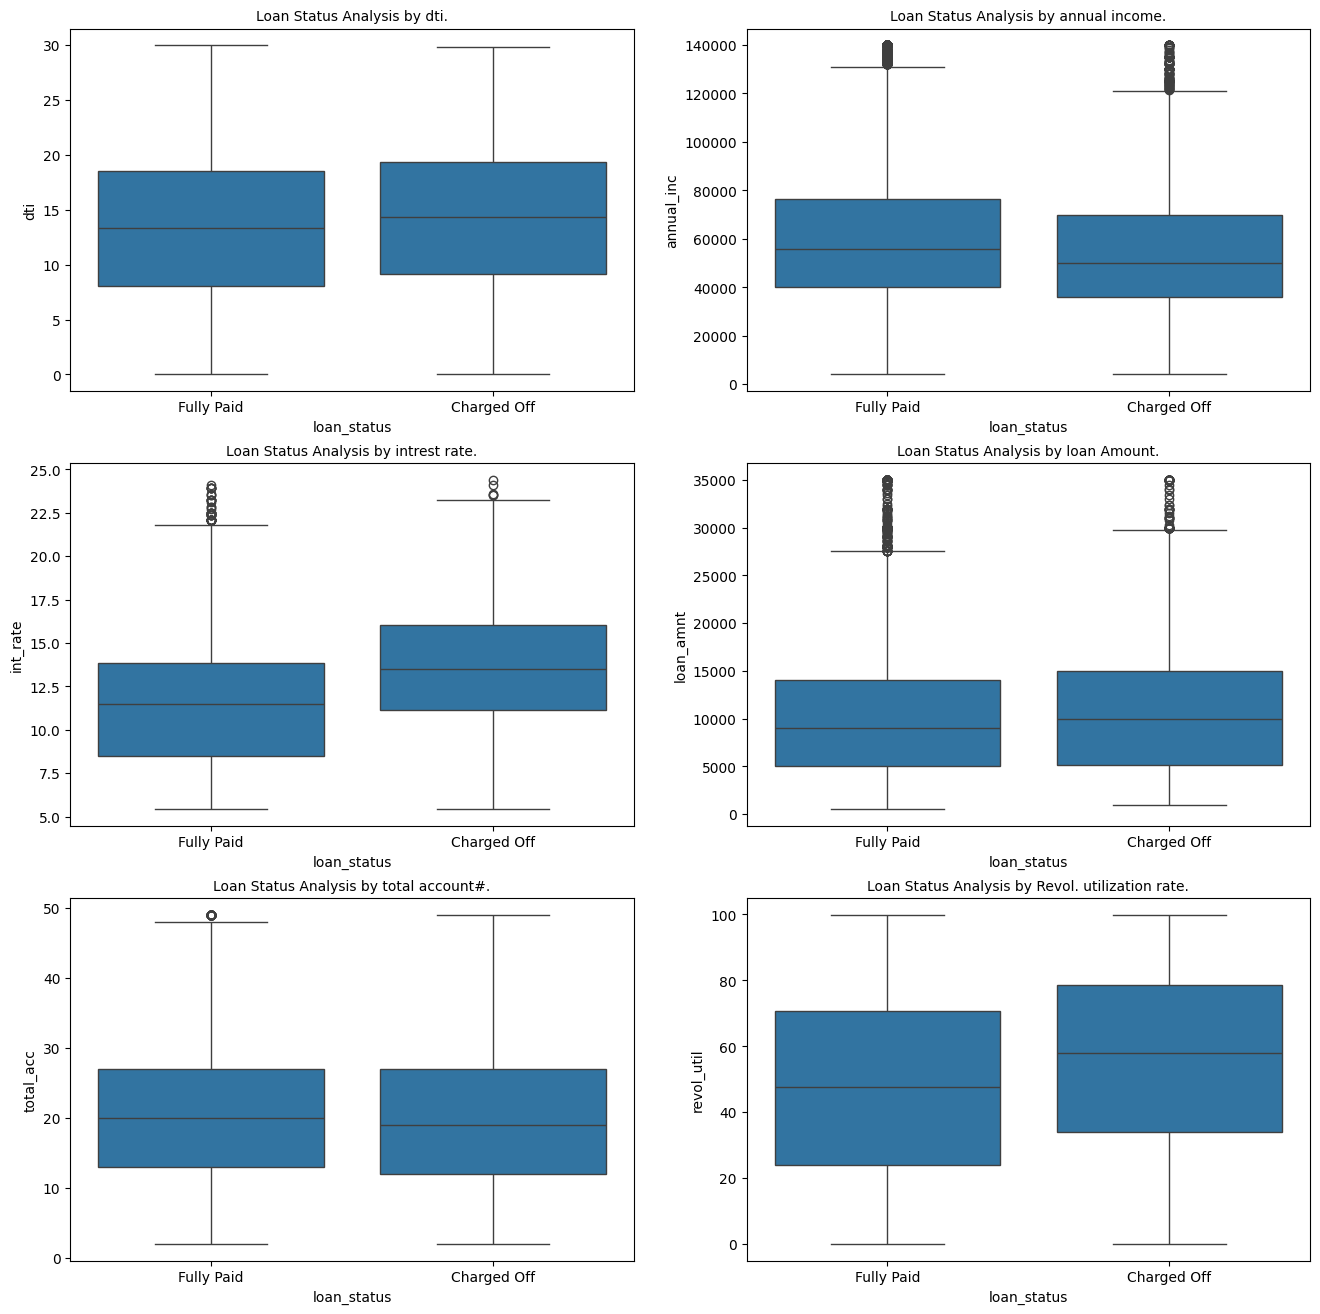

In [117]:
loanstatus_analysis(List2)

### Observations
* More Revol. utilization rate more loan charged off probability
* loan default tend to increase with increment of loan amount
* More Debt to Income higher chances of default.
* loan default tend to increase with increments of interest rate


In [118]:
# pip install seaborn --upgrade

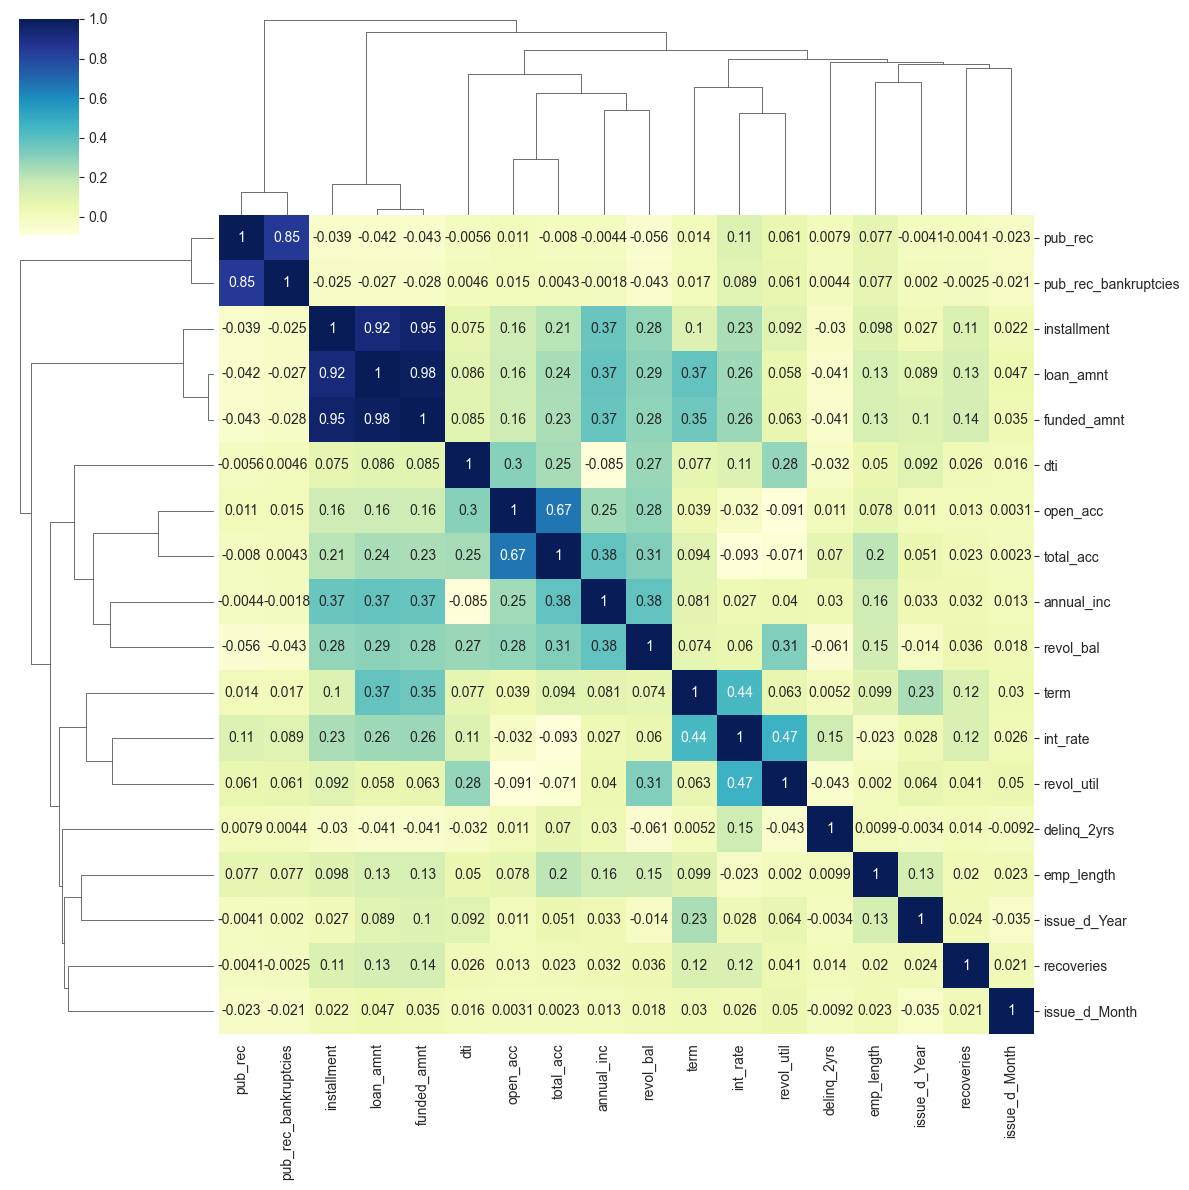

In [119]:
#Co relation Analysis ofdifferent variables
sns.set_style("whitegrid")
sns.clustermap(data=loan_df.corr(method='pearson', numeric_only=True), cmap='YlGnBu', figsize=(12,12), annot=True)
plt.show()

### Observations
* Annual Income,installment and funded amount is moderately co-related to revol balance
* Term is co-related to loan Amount
* Revol utilization is moderately co related to interest
* Term and interest rate are co-related


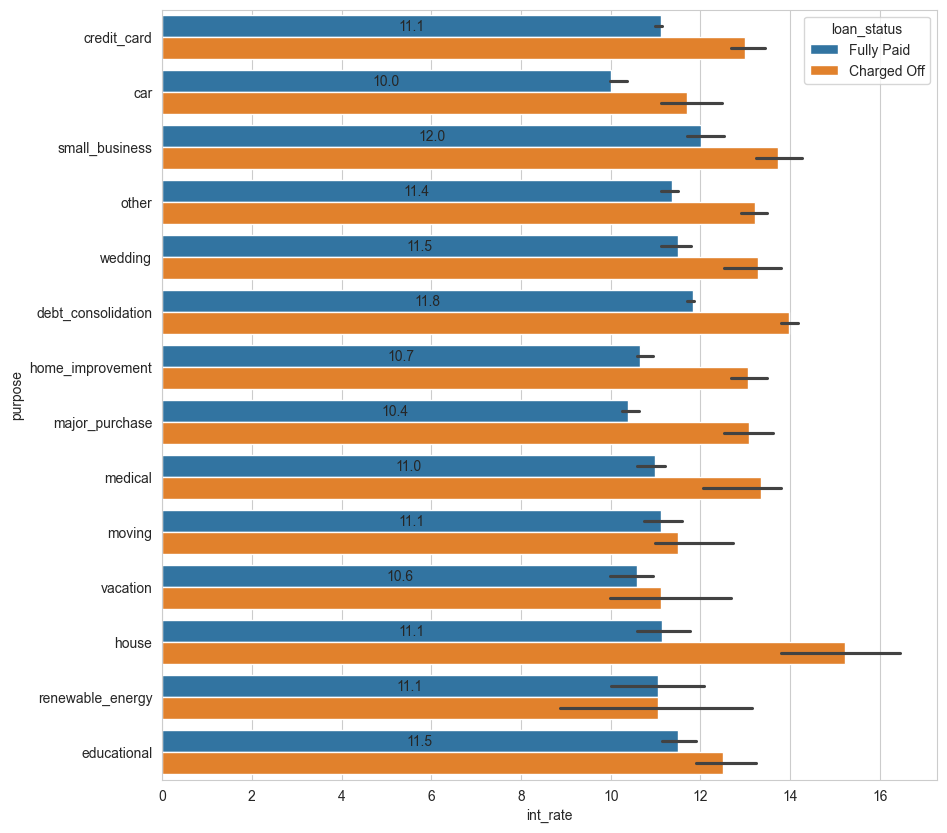

In [120]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=loan_df, y="purpose", x="int_rate", hue="loan_status", estimator=np.median)
ax.bar_label(ax.containers[0],fmt='%.1f',label_type='center')
plt.show()

### For Small Business purpose loan ,interest rate is higher hence more chances to default

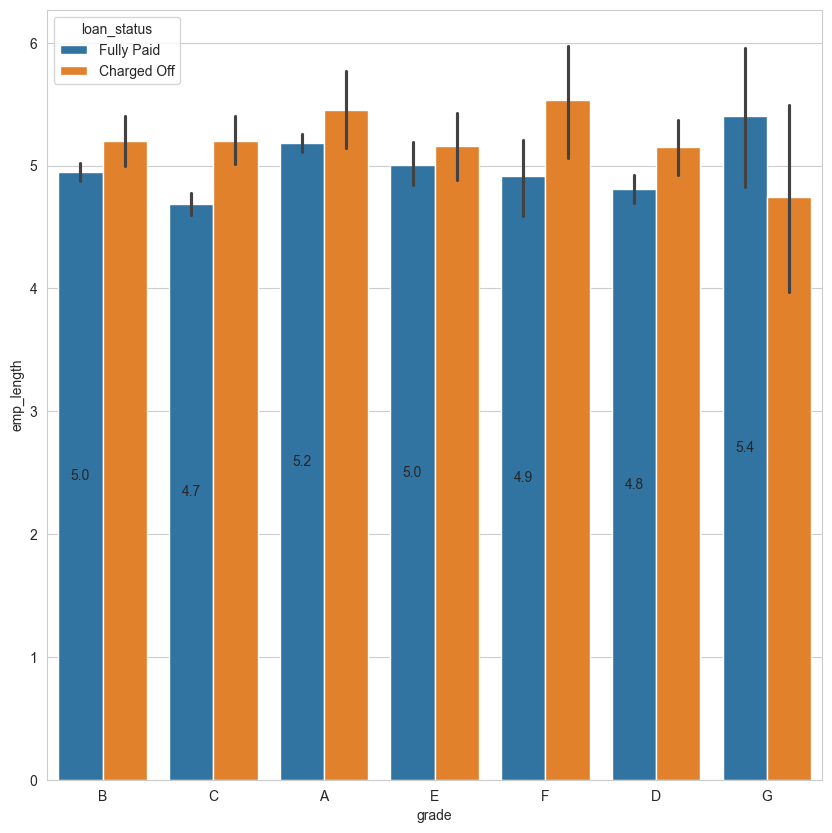

In [121]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=loan_df, y="emp_length", x="grade", hue="loan_status")
ax.bar_label(ax.containers[0],fmt='%.1f',label_type='center')
plt.show()

### Employee with more than 5 years of employment are in loan category F and G and probability of default is more

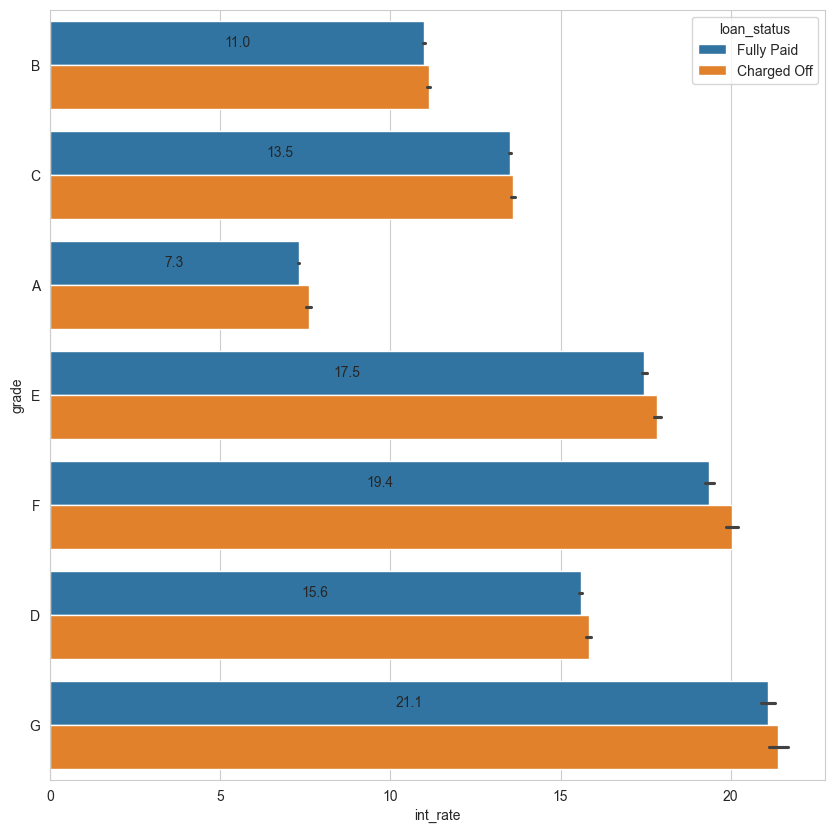

In [122]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=loan_df, y="grade", x="int_rate", hue="loan_status")
ax.bar_label(ax.containers[0],fmt='%.1f',label_type='center')
plt.show()

### Interest Rate is higher for G and F category hence % of default is higher

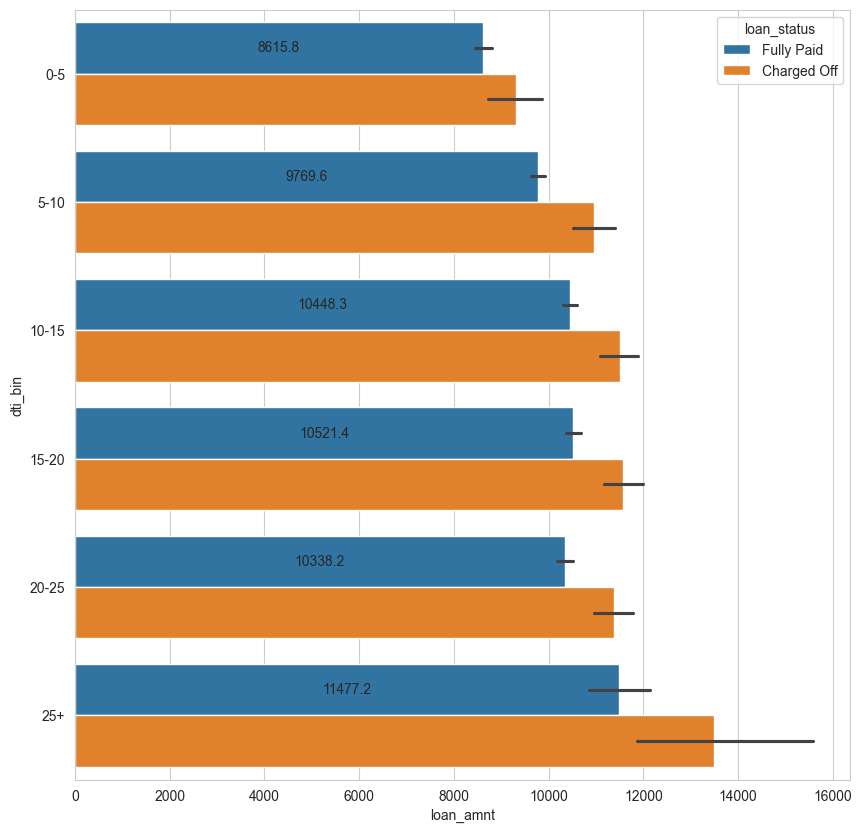

In [123]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=loan_df, y="dti_bin", x="loan_amnt", hue="loan_status")
ax.bar_label(ax.containers[0],fmt='%.1f',label_type='center')
plt.show()

### Loan amount is not varying much for different Debt to income category and higher default occurred in higher dti category

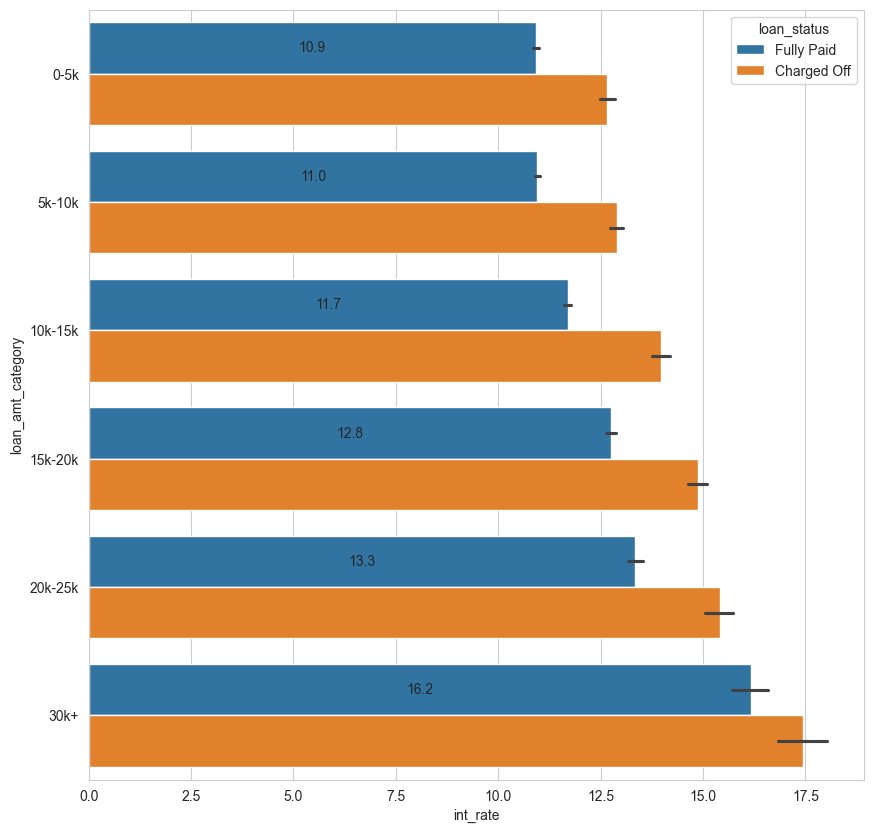

In [124]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=loan_df, y="loan_amt_category", x="int_rate", hue="loan_status")
ax.bar_label(ax.containers[0],fmt='%.1f',label_type='center')
plt.show()

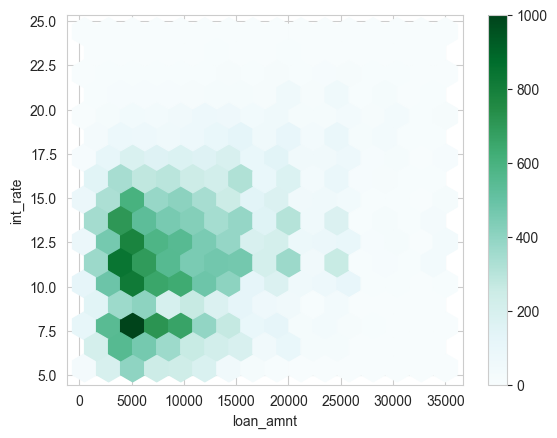

In [125]:
loan_df.plot.hexbin(x='loan_amnt', y='int_rate', gridsize=15)
plt.show()

### Interest rate is consistent for various loan amount category and default probability more with higher interest rate.

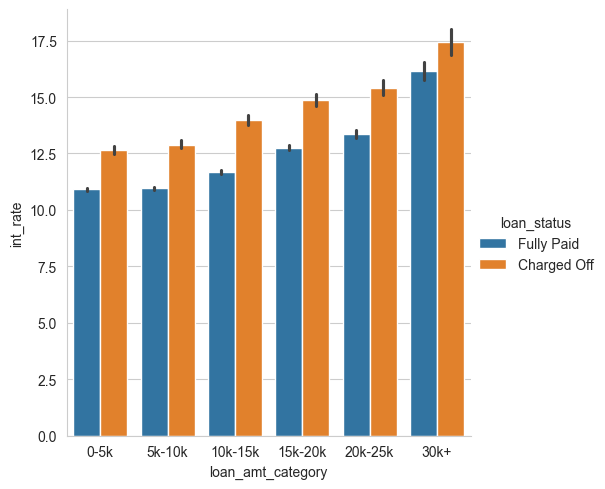

In [126]:
sns.catplot(data=loan_df, x='loan_amt_category', y='int_rate', hue='loan_status',kind='bar')
plt.show()

### Interest Rate for charged off loan are higher with loan amount increase compared to fully paid